<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [6]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [7]:
# Answer:
movies.describe()

# Average movie duration is 120.98mins 

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [8]:
# Answer:
movies.sort_values(by='duration')

# Shortest movie is Freaks at 64mins. Longest movie is Hamlet at 242mins.

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

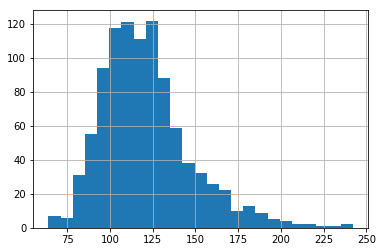

In [21]:
# Answer:
m1 = movies.loc[:,'duration'].hist(bins=25)
# Bins = 25 seems appropriate to show the smooth right-skewing

#### Use a box plot to display that same data.

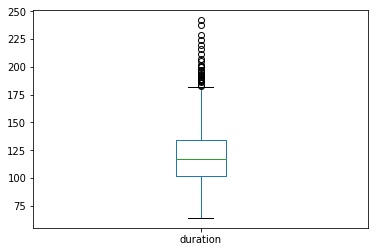

In [17]:
# Answer:
m2 = movies.loc[:,'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [25]:
# Answer:
movies.loc[:,['content_rating','title']].groupby('content_rating').count().sort_values(by='content_rating')

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


#### Use a visualization to display that same data, including a title and x and y labels.

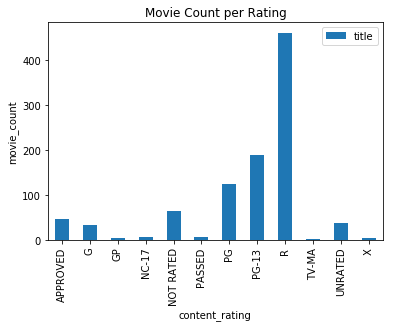

In [35]:
# Answer:
m_df = movies.loc[:,['content_rating','title']].groupby('content_rating').count()
ax = m_df.plot(kind='bar')
ax.set_title('Movie Count per Rating')
ax.set_ylabel('movie_count');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [38]:
# Answer:
movies_fix = movies.replace(['NOT RATED','APPROVED','PASSED','GP'],'UNRATED')


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [39]:
# Answer:
movies_fix2 = movies_fix.replace(['X','TV-MA'],'NC-17')

#### Count the number of missing values in each column.

In [45]:
# Answer:
movies_fix2.count()
# Based on below and the shape of the df is 979 rows by 6 columns, there are 3 NA values in content_rating column

star_rating       979
title             979
content_rating    976
genre             979
duration          979
actors_list       979
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [47]:
# Answer:
movies_fix2.loc[movies_fix2.loc[:, 'content_rating'].isna(), :]
movies_fix2.set_value(187,'content_rating','PG')
movies_fix2.set_value(649,'content_rating','PG')
movies_fix2.set_value(936,'content_rating','G')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [51]:
movies_fix2.loc[936,['title','content_rating']]

title             True Grit
content_rating            G
Name: 936, dtype: object

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [57]:
# Answer:
print('Average star rating for movies over 2 hours is ' + str(movies_fix2.loc[movies_fix2.loc[:,'duration']>=120,'star_rating'].mean()))
print('Average star rating for movies under 2 hours is ' + str(movies_fix2.loc[movies_fix2.loc[:,'duration']<120,'star_rating'].mean()))

Average star rating for movies over 2 hours is 7.948898678414082
Average star rating for movies under 2 hours is 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

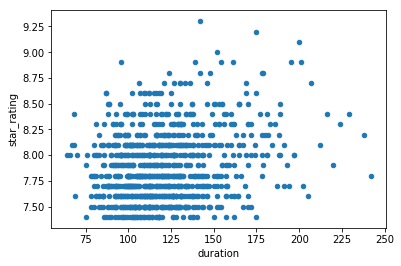

In [62]:
# Answer:
movies_fix2.loc[:,['duration','star_rating']].plot(kind='scatter',x='duration',y='star_rating')

#### Calculate the average duration for each genre.

In [63]:
# Answer:
movies_fix2.groupby(by='genre').mean()

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

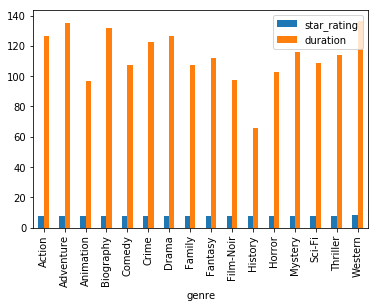

In [70]:
# Answer:
movies_fix2.groupby(by='genre').mean().plot(kind='bar');

#### Find the title of the movie with the highest star rating in each genre

In [82]:
# Answer:

print('Movie with the highest rating ' + str(movies_fix2.groupby('title')['star_rating'].max().sort_values(ascending=False).head(1)))
movies_fix2.to_csv('ex.csv')

Movie with the highest rating title
The Shawshank Redemption    9.3
Name: star_rating, dtype: float64


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [107]:
# Answer:
dup = movies_fix2.loc[:,['title','content_rating']].groupby('title').count()
dup.sort_values(by='content_rating', ascending=False)
# The above result shows duplicate content ratings for a title, indicating it's a duplicate title, but maybe same movies made in different year



,content_rating
title,
The Girl with the Dragon Tattoo,2
True Grit,2
Les Miserables,2
Dracula,2
Stand by Me,1
Star Trek: First Contact,1
Star Trek Into Darkness,1
Star Trek II: The Wrath of Khan,1
Star Trek,1


In [108]:
dup2 = movies_fix2.loc[:,['title','actors_list']].groupby('title').count()
dup2.sort_values(by='actors_list', ascending=False)
#This here shows if the actors lists are also different although the lists can just be in different orders.
#This are indeed different movies and are not duplicates

,actors_list
title,
The Girl with the Dragon Tattoo,2
True Grit,2
Les Miserables,2
Dracula,2
Stand by Me,1
Star Trek: First Contact,1
Star Trek Into Darkness,1
Star Trek II: The Wrath of Khan,1
Star Trek,1


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [167]:
# Answer:
movies_fix2.loc[:,['title','genre']].groupby('genre').count() > 10
mm = movies_fix2.loc[movies_fix2.genre.isin(['Action', 'Adventure','Animation','Biography','Comedy','Crime','Drama','Horror','Mystery']), :]
mm.loc[:,['genre','star_rating']].groupby('genre').mean()

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [191]:
# Answer:
mm = movies_fix2.groupby('genre')['star_rating'].agg(['count','mean'])

mm.loc[mm.loc[:,'count']>10,:]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!